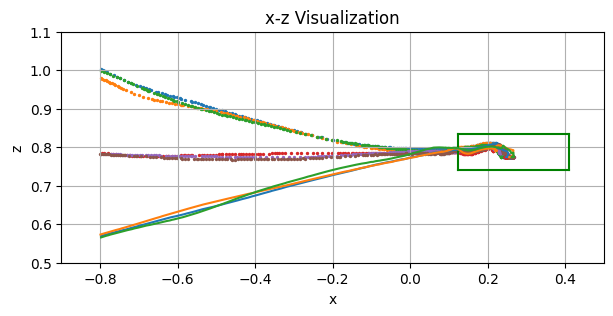

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

def load_filtered_data(file_path):
    # 读取文件
    df = pd.read_csv(file_path, header=None, skiprows=1)

    # 过滤出时间值大于最后一行时间的行
    filtered_data = df.iloc[:-1]  # 跳过最后一行

    # 获取最后一行的时间值
    # last_time = df.iloc[-1, 0]
    # filtered_data = filtered_data[filtered_data[0] > last_time]

    x_start = -0.80
    filtered_data = filtered_data[filtered_data[1] > x_start]

    return filtered_data

x_min, x_max = 0.155-0.032, 0.377+0.032
z_min, z_max = 0.741, 0.834

plt.figure(figsize=(7, 3))

plt.plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
plt.plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
plt.plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
plt.plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边

for csv_file in glob.glob('./data/high/*.csv'):
    df = load_filtered_data(csv_file)
    plt.scatter(df[1], df[3], s=2, label=csv_file.split('/')[-1])

for csv_file in glob.glob('./data/middle/*.csv'):
    df = load_filtered_data(csv_file)
    plt.scatter(df[1], df[3], s=2, label=csv_file.split('/')[-1])

for csv_file in glob.glob('./data/low/*.csv'):
    df = load_filtered_data(csv_file)
    # plt.scatter(df[1], df[3], s=2, label=csv_file.split('/')[-1])
    plt.plot(df[1], df[3], label=csv_file.split('/')[-1])


plt.xlabel('x')
plt.ylabel('z')
plt.title('x-z Visualization')
# plt.legend()
plt.grid(True)
plt.xlim(-0.9, 0.5)
plt.ylim(0.5, 1.1)
# plt.axis('equal')
plt.show()

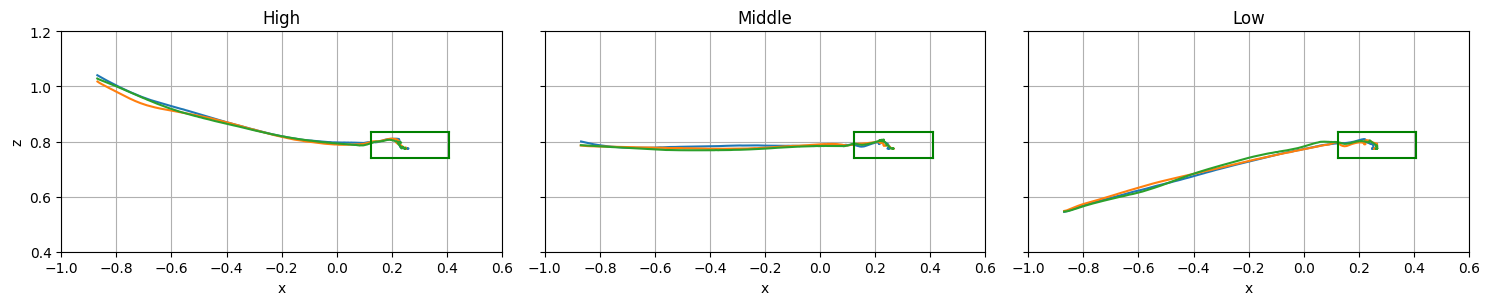

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

def load_filtered_data(file_path):
    df = pd.read_csv(file_path, header=None, skiprows=1)
    filtered_data = df.iloc[:-1]
    x_start = -0.870
    filtered_data = filtered_data[filtered_data[1] > x_start]
    return filtered_data

x_min, x_max = 0.155-0.032, 0.377+0.032
z_min, z_max = 0.741, 0.834

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# high
for csv_file in glob.glob('./data/high/*.csv'):
    df = load_filtered_data(csv_file)
    # axs[0].scatter(df[1], df[3], s=2, label=csv_file.split('/')[-1])
    axs[0].plot(df[1], df[3], label=csv_file.split('/')[-1])
axs[0].plot([x_min, x_max], [z_min, z_min], 'g-')
axs[0].plot([x_min, x_max], [z_max, z_max], 'g-')
axs[0].plot([x_min, x_min], [z_min, z_max], 'g-')
axs[0].plot([x_max, x_max], [z_min, z_max], 'g-')
axs[0].set_title('High')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].grid(True)
axs[0].set_xlim(-1.0, 0.6)
axs[0].set_ylim(0.4, 1.2)
axs[0].set_aspect('equal')

# middle
for csv_file in glob.glob('./data/middle/*.csv'):
    df = load_filtered_data(csv_file)
    # axs[1].scatter(df[1], df[3], s=2, label=csv_file.split('/')[-1])
    axs[1].plot(df[1], df[3], label=csv_file.split('/')[-1])
axs[1].plot([x_min, x_max], [z_min, z_min], 'g-')
axs[1].plot([x_min, x_max], [z_max, z_max], 'g-')
axs[1].plot([x_min, x_min], [z_min, z_max], 'g-')
axs[1].plot([x_max, x_max], [z_min, z_max], 'g-')
axs[1].set_title('Middle')
axs[1].set_xlabel('x')
axs[1].grid(True)
axs[1].set_xlim(-1.0, 0.6)
axs[1].set_ylim(0.4, 1.2)
axs[1].set_aspect('equal')

# low
for csv_file in glob.glob('./data/low/*.csv'):
    df = load_filtered_data(csv_file)
    axs[2].plot(df[1], df[3], label=csv_file.split('/')[-1])
axs[2].plot([x_min, x_max], [z_min, z_min], 'g-')
axs[2].plot([x_min, x_max], [z_max, z_max], 'g-')
axs[2].plot([x_min, x_min], [z_min, z_max], 'g-')
axs[2].plot([x_max, x_max], [z_min, z_max], 'g-')
axs[2].set_title('Low')
axs[2].set_xlabel('x')
axs[2].grid(True)
axs[2].set_xlim(-1.0, 0.6)
axs[2].set_ylim(0.4, 1.2)
axs[2].set_aspect('equal')

plt.tight_layout()
plt.show()

## Ablation Study I: With and Without Aerodynamic Compensation in Low-Level Planning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def load_and_filter_trajectories(file_pattern, x_threshold=-0.90):
    """
    Load and filter trajectory data from CSV files.
    
    Args:
        file_pattern (str): Glob pattern for CSV files (e.g., './data/middle/*.csv').
        x_threshold (float): Threshold for filtering x values.
    
    Returns:
        list: Lists of t, x, z arrays for each valid trajectory.
    """
    all_t, all_x, all_z = [], [], []
    
    for csv_file in glob.glob(file_pattern):
        try:
            df = pd.read_csv(csv_file, header=None, skiprows=1)
            t_start = df[0].iloc[-1]
            df = df.iloc[:-1]
            df = df[(df[1] > x_threshold) & (df[0] > t_start)]
            
            if df.empty:
                print(f"{csv_file} -> Empty data, skipping")
                continue
                
            t = df[0].to_numpy() - df[0].iloc[0]  # Align time to 0
            x = df[1].to_numpy()
            z = df[3].to_numpy()
            
            all_t.append(t)
            all_x.append(x)
            all_z.append(z)
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
            continue
            
    return all_t, all_x, all_z

def interpolate_trajectories(all_t, all_x, all_z, num_points=500):
    """
    Interpolate trajectories to a common time grid and compute mean/std.
    
    Args:
        all_t (list): List of time arrays.
        all_x (list): List of x-coordinate arrays.
        all_z (list): List of z-coordinate arrays.
        num_points (int): Number of points for interpolation.
    
    Returns:
        tuple: Common time grid, mean and std for x and z.
    """
    t_min = max(t[0] for t in all_t)
    t_max = min(t[-1] for t in all_t)
    t_common = np.linspace(t_min, t_max, num_points)
    
    x_interp_all = [np.interp(t_common, t, x) for t, x in zip(all_t, all_x)]
    z_interp_all = [np.interp(t_common, t, z) for t, z in zip(all_t, all_z)]
    
    x_interp_all = np.array(x_interp_all)
    z_interp_all = np.array(z_interp_all)
    
    x_mean = np.mean(x_interp_all, axis=0)
    x_std = np.std(x_interp_all, axis=0)
    z_mean = np.mean(z_interp_all, axis=0)
    z_std = np.std(z_interp_all, axis=0)
    
    return t_common, x_mean, x_std, z_mean, z_std



def plot_hangar_box():
    x_min, x_max = 0.155 - 0.032, 0.377 + 0.032
    z_min, z_max = 0.741, 0.834
    plt.plot([x_min, x_max], [z_min, z_min], 'g-')  # Bottom
    plt.plot([x_min, x_max], [z_max, z_max], 'g-')  # Top
    plt.plot([x_min, x_min], [z_min, z_max], 'g-')  # Left
    plt.plot([x_max, x_max], [z_min, z_max], 'g-')  # Right



if __name__ == '__main__':

    file_pattern = './data/middle/*.csv'
    x_threshold = -0.90
    num_points = 500

    all_t, all_x, all_z = load_and_filter_trajectories(file_pattern, x_threshold)

    t_common, x_mean, x_std, z_mean, z_std = interpolate_trajectories(all_t, all_x, all_z, num_points)


    plt.figure(figsize=(7.5, 1))
    plt.plot(x_mean, z_mean, color='green', label='Mean z')
    plt.fill_between(x_mean, z_mean - z_std, z_mean + z_std, color='red', alpha=0.3)
    
    plot_hangar_box()
    
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('x-z Visualization with Mean and Std')
    plt.grid(True)
    plt.xlim(-1.0, 0.5)
    plt.ylim(0.7, 0.9)
    plt.legend(loc = 'upper left')
    plt.show()



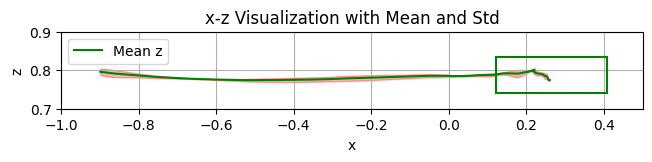

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def load_and_filter_trajectories(file_pattern, x_threshold=-0.90):
    """
    Load and filter trajectory data from CSV files.
    
    Args:
        file_pattern (str): Glob pattern for CSV files (e.g., './data/middle/*.csv').
        x_threshold (float): Threshold for filtering x values.
    
    Returns:
        list: Lists of t, x, z arrays for each valid trajectory.
    """
    all_t, all_x, all_z = [], [], []
    
    for csv_file in glob.glob(file_pattern):
        try:
            df = pd.read_csv(csv_file, header=None, skiprows=1)
            t_start = df[0].iloc[-1]
            df = df.iloc[:-1]
            df = df[(df[1] > x_threshold) & (df[0] > t_start)]
            
            if df.empty:
                print(f"{csv_file} -> Empty data, skipping")
                continue
                
            t = df[0].to_numpy() - df[0].iloc[0]  # Align time to 0
            x = df[1].to_numpy()
            z = df[3].to_numpy()
            
            all_t.append(t)
            all_x.append(x)
            all_z.append(z)
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
            continue
            
    return all_t, all_x, all_z

def interpolate_trajectories(all_t, all_x, all_z, num_points=500):
    """
    Interpolate trajectories to a common time grid and compute mean/std.
    
    Args:
        all_t (list): List of time arrays.
        all_x (list): List of x-coordinate arrays.
        all_z (list): List of z-coordinate arrays.
        num_points (int): Number of points for interpolation.
    
    Returns:
        tuple: Common time grid, mean and std for x and z.
    """
    t_min = max(t[0] for t in all_t)
    t_max = min(t[-1] for t in all_t)
    t_common = np.linspace(t_min, t_max, num_points)
    
    x_interp_all = [np.interp(t_common, t, x) for t, x in zip(all_t, all_x)]
    z_interp_all = [np.interp(t_common, t, z) for t, z in zip(all_t, all_z)]
    
    x_interp_all = np.array(x_interp_all)
    z_interp_all = np.array(z_interp_all)
    
    x_mean = np.mean(x_interp_all, axis=0)
    x_std = np.std(x_interp_all, axis=0)
    z_mean = np.mean(z_interp_all, axis=0)
    z_std = np.std(z_interp_all, axis=0)
    
    return t_common, x_mean, x_std, z_mean, z_std



def plot_hangar_box():
    x_min, x_max = 0.155 - 0.032, 0.377 + 0.032
    z_min, z_max = 0.741, 0.834
    plt.plot([x_min, x_max], [z_min, z_min], 'g-')  # Bottom
    plt.plot([x_min, x_max], [z_max, z_max], 'g-')  # Top
    plt.plot([x_min, x_min], [z_min, z_max], 'g-')  # Left
    plt.plot([x_max, x_max], [z_min, z_max], 'g-')  # Right



if __name__ == '__main__':

    file_pattern = './data/middle/*.csv'
    x_threshold = -0.90
    num_points = 500

    all_t, all_x, all_z = load_and_filter_trajectories(file_pattern, x_threshold)

    t_common, x_mean, x_std, z_mean, z_std = interpolate_trajectories(all_t, all_x, all_z, num_points)


    plt.figure(figsize=(7.5, 1))
    plt.plot(x_mean, z_mean, color='green', label='Mean z')
    plt.fill_between(x_mean, z_mean - z_std, z_mean + z_std, color='red', alpha=0.3)
    
    plot_hangar_box()
    
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('x-z Visualization with Mean and Std')
    plt.grid(True)
    plt.xlim(-1.0, 0.5)
    plt.ylim(0.7, 0.9)
    plt.legend(loc = 'upper left')
    plt.show()



#### Waypoint middle 2

把高度整体增加了，但还是不行，弃用

-0.893, 0.066, 0.780
 0.050, 0.066, 0.780
 0.100, 0.066, 0.780
 0.300, 0.066, 0.780

#### Trajectory middle 2

3.27915,-0.893,0,0,0,0.138713,-0.0880099,0.0198348,-0.00156663,0.066,0,0,0,6.93889e-18,-3.46945e-18,8.67362e-19,-5.42101e-20,0.78,0,0,0,-1.38778e-16,1.11022e-16,-2.77556e-17,2.60209e-18,0,0,0,0,0,0,0,0
0.580811,0.05,0.17164,-0.156186,0.00360198,-0.869287,3.04027,-3.26581,1.14988,0.066,-1.36527e-17,8.83661e-18,1.6294e-17,-3.55271e-15,1.42109e-14,0,0,0.78,3.83196e-16,-5.9996e-17,-1.41936e-16,0,-1.13687e-13,0,0,0,0,0,0,0,0,0,0
1.62706,0.1,0.0563375,0.0688116,0.0225626,0.42182,-0.740903,0.408481,-0.0747813,0.066,3.02642e-17,-6.85664e-20,-1.94869e-17,-1.11022e-16,1.66533e-16,-5.55112e-17,1.38778e-17,0.78,-5.45719e-16,-3.43513e-16,5.91968e-16,2.66454e-15,-3.55271e-15,1.77636e-15,-3.33067e-16,0,0,0,0,0,0,0,0


当前的状态（打开CE和GE，X_ADVC = 0.032f,落点靠后，x=0.3，打开mixer）

`mocap_data/20250522_21_31_41.csv` # 撞击到顶了，挺严重的

关掉mixer试试（只用了CE和GE调整total thrust）

当前的状态（打开CE和GE，X_ADVC = 0.032f,落点靠后，x=0.3）

`mocap_data/20250522_21_50_15.csv` # 撞击到顶了，但比上次好了一些。

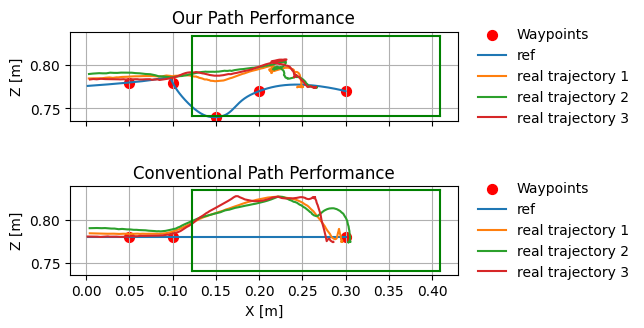

In [7]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import argparse

import uav_trajectory
import pandas as pd
import glob


def load_filtered_data(file_path, value_threshold=-0.877):
    """
    Load and filter the trajectory data from a CSV file with a title 't,x,y,z,qx,qy,qz,qw'.
    Args:
        file_path (str): Path to the CSV file containing trajectory data.
    Returns:
        pd.DataFrame: Filtered trajectory data excluding the last row and with x > -0.877.
    """
    df = pd.read_csv(file_path, header=None, skiprows=1)

    filtered_data = df.iloc[:-1]  # Skip the last row. It records the time when the trajectory starts to execute.
    # last_time = df.iloc[-1, 0]
    # filtered_data = filtered_data[filtered_data[0] > last_time]

    filtered_data = filtered_data[filtered_data[1] > value_threshold]

    return filtered_data


if __name__ == "__main__":

    VAL_FILTER = - 0.0  # Default: -0.877 Value threshold for filtering the trajectory data
    fig, ax = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

    # ============================
    # Subplot 1
    # ============================

    # Plot waypoints
    waypoints_path = "../data/waypoints/final_middle.csv"
    waypoints = np.loadtxt(waypoints_path, delimiter=",")
    mask = waypoints[:, 0] > VAL_FILTER
    ax[0].scatter(waypoints[mask, 0], waypoints[mask, 2], c="red", marker="o", s=50, label="Waypoints")


    # Plot commanded trajectory
    traj = uav_trajectory.Trajectory()
    trajectory_path = "../data/trajectories/final_middle_traj.csv"
    traj.loadcsv(trajectory_path)
    ts = np.arange(0, traj.duration, 0.01)
    evals = np.empty((len(ts), 15))
    for t, i in zip(ts, range(0, len(ts))):
        e = traj.eval(t)
        evals[i, 0:3] = e.pos
        evals[i, 3:6] = e.vel
        evals[i, 6:9] = e.acc
        evals[i, 9:12] = e.omega
        evals[i, 12] = e.yaw
        evals[i, 13] = e.roll
        evals[i, 14] = e.pitch
    mask = evals[:, 0] > VAL_FILTER
    ax[0].plot(evals[mask, 0], evals[mask, 2], label="ref")



    # Plot real trajectory   
    for i, csv_file in enumerate(glob.glob('./data/middle/*.csv'), 1):
        df = load_filtered_data(csv_file, VAL_FILTER)
        ax[0].plot(df[1], df[3], label= f"real trajectory {i}")

    x_min, x_max = 0.155-0.032, 0.377+0.032
    z_min, z_max = 0.741, 0.834

    ax[0].plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
    ax[0].plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
    ax[0].plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
    ax[0].plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边
    # ax[0].set_xlabel("X [m]")
    ax[0].set_ylabel("Z [m]")
    ax[0].set_title("Our Path Performance")
    # ax[0].text(1.02, 0.5, "Our Path Performance", 
    #            va='center', ha='left', rotation=90, 
    #            fontsize=12, transform=ax[0].transAxes)
    ax[0].grid(True)
    ax[0].set_aspect('equal')
    # ax[0].axis('equal')
    # ax[0].legend()
    # ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
    # ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.08), ncol=3, frameon=False)
    ax[0].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1, frameon=False)





    # ============================
    # Subplot 2
    # ============================

    # Plot waypoints
    waypoints = np.array([
        [-0.893, 0.066, 0.780],
        [ 0.050, 0.066, 0.780],
        [ 0.100, 0.066, 0.780],
        [ 0.300, 0.066, 0.780]
    ])
    mask = waypoints[:, 0] > VAL_FILTER
    ax[1].scatter(waypoints[mask, 0], waypoints[mask, 2], c="red", marker="o", s=50, label="Waypoints")


    # Plot commanded trajectory
    traj = uav_trajectory.Trajectory()
    trajectory_path = "./data/ablation_1/middle_traj_plaint.csv"
    traj.loadcsv(trajectory_path)
    ts = np.arange(0, traj.duration, 0.01)
    evals = np.empty((len(ts), 15))
    for t, i in zip(ts, range(0, len(ts))):
        e = traj.eval(t)
        evals[i, 0:3] = e.pos
        evals[i, 3:6] = e.vel
        evals[i, 6:9] = e.acc
        evals[i, 9:12] = e.omega
        evals[i, 12] = e.yaw
        evals[i, 13] = e.roll
        evals[i, 14] = e.pitch
    mask = evals[:, 0] > VAL_FILTER
    ax[1].plot(evals[mask, 0], evals[mask, 2], label="ref")



    # Plot real trajectory
    for i, csv_file in enumerate(glob.glob('./data/ablation_1/fail_scenario/*.csv'), 1):
        df = load_filtered_data(csv_file, VAL_FILTER)
        ax[1].plot(df[1], df[3], label=f"real trajectory {i}")

    x_min, x_max = 0.155-0.032, 0.377+0.032
    z_min, z_max = 0.741, 0.834

    ax[1].plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
    ax[1].plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
    ax[1].plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
    ax[1].plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边s
    ax[1].set_xlabel("X [m]")
    ax[1].set_ylabel("Z [m]")
    ax[1].set_title("Conventional Path Performance")
    # ax[1].text(1.02, 0.5, "Conventional Path Performance", 
    #            va='center', ha='left', rotation=90, 
    #            fontsize=12, transform=ax[1].transAxes)
    ax[1].grid(True)
    ax[1].set_aspect("equal")
    # ax[1].axis('equal')
    # ax[1].legend()
    # ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3, frameon=False)
    # ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
    ax[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1, frameon=False)


    # plt.tight_layout(h_pad=0.2)
    plt.subplots_adjust(hspace=0.0)
    plt.show()

## Ablation Study II: With and Without Aerodynamic Compensation in Low-Level Control

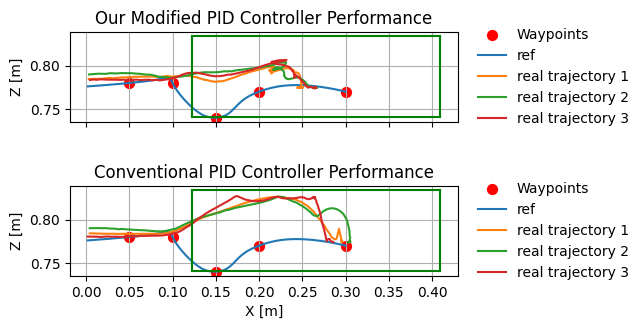

In [52]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import argparse

import uav_trajectory
import pandas as pd
import glob


def load_filtered_data(file_path, value_threshold=-0.877):
    """
    Load and filter the trajectory data from a CSV file with a title 't,x,y,z,qx,qy,qz,qw'.
    Args:
        file_path (str): Path to the CSV file containing trajectory data.
    Returns:
        pd.DataFrame: Filtered trajectory data excluding the last row and with x > -0.877.
    """
    df = pd.read_csv(file_path, header=None, skiprows=1)

    filtered_data = df.iloc[:-1]  # Skip the last row. It records the time when the trajectory starts to execute.
    # last_time = df.iloc[-1, 0]
    # filtered_data = filtered_data[filtered_data[0] > last_time]

    filtered_data = filtered_data[filtered_data[1] > value_threshold]

    return filtered_data


if __name__ == "__main__":

    VAL_FILTER = - 0.0  # Default: -0.877 Value threshold for filtering the trajectory data
    fig, ax = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

    # ============================
    # Subplot 1
    # ============================

    # Plot waypoints
    waypoints_path = "../data/waypoints/final_middle.csv"
    waypoints = np.loadtxt(waypoints_path, delimiter=",")
    mask = waypoints[:, 0] > VAL_FILTER
    ax[0].scatter(waypoints[mask, 0], waypoints[mask, 2], c="red", marker="o", s=50, label="Waypoints")


    # Plot commanded trajectory
    traj = uav_trajectory.Trajectory()
    trajectory_path = "../data/trajectories/final_middle_traj.csv"
    traj.loadcsv(trajectory_path)
    ts = np.arange(0, traj.duration, 0.01)
    evals = np.empty((len(ts), 15))
    for t, i in zip(ts, range(0, len(ts))):
        e = traj.eval(t)
        evals[i, 0:3] = e.pos
        evals[i, 3:6] = e.vel
        evals[i, 6:9] = e.acc
        evals[i, 9:12] = e.omega
        evals[i, 12] = e.yaw
        evals[i, 13] = e.roll
        evals[i, 14] = e.pitch
    mask = evals[:, 0] > VAL_FILTER
    ax[0].plot(evals[mask, 0], evals[mask, 2], label="ref")



    # Plot real trajectory   
    for i, csv_file in enumerate(glob.glob('./data/middle/*.csv'), 1):
        df = load_filtered_data(csv_file, VAL_FILTER)
        ax[0].plot(df[1], df[3], label= f"real trajectory {i}")

    x_min, x_max = 0.155-0.032, 0.377+0.032
    z_min, z_max = 0.741, 0.834

    ax[0].plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
    ax[0].plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
    ax[0].plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
    ax[0].plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边
    # ax[0].set_xlabel("X [m]")
    ax[0].set_ylabel("Z [m]")
    ax[0].set_title("Our Modified PID Controller Performance")
    # ax[0].text(1.02, 0.5, "Our Path Performance", 
    #            va='center', ha='left', rotation=90, 
    #            fontsize=12, transform=ax[0].transAxes)
    ax[0].grid(True)
    ax[0].set_aspect('equal')
    # ax[0].axis('equal')
    # ax[0].legend()
    # ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
    # ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.08), ncol=3, frameon=False)
    ax[0].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1, frameon=False)





    # ============================
    # Subplot 2
    # ============================

    # Plot waypoints
    waypoints_path = "../data/waypoints/final_middle.csv"
    waypoints = np.loadtxt(waypoints_path, delimiter=",")
    mask = waypoints[:, 0] > VAL_FILTER
    ax[1].scatter(waypoints[mask, 0], waypoints[mask, 2], c="red", marker="o", s=50, label="Waypoints")


    # Plot commanded trajectory
    traj = uav_trajectory.Trajectory()
    trajectory_path = "../data/trajectories/final_middle_traj.csv"
    traj.loadcsv(trajectory_path)
    ts = np.arange(0, traj.duration, 0.01)
    evals = np.empty((len(ts), 15))
    for t, i in zip(ts, range(0, len(ts))):
        e = traj.eval(t)
        evals[i, 0:3] = e.pos
        evals[i, 3:6] = e.vel
        evals[i, 6:9] = e.acc
        evals[i, 9:12] = e.omega
        evals[i, 12] = e.yaw
        evals[i, 13] = e.roll
        evals[i, 14] = e.pitch
    mask = evals[:, 0] > VAL_FILTER
    ax[1].plot(evals[mask, 0], evals[mask, 2], label="ref")



    # Plot real trajectory
    for i, csv_file in enumerate(glob.glob('./data/ablation_1/fail_scenario/*.csv'), 1):
        df = load_filtered_data(csv_file, VAL_FILTER)
        ax[1].plot(df[1], df[3], label=f"real trajectory {i}")

    x_min, x_max = 0.155-0.032, 0.377+0.032
    z_min, z_max = 0.741, 0.834

    ax[1].plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
    ax[1].plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
    ax[1].plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
    ax[1].plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边s
    ax[1].set_xlabel("X [m]")
    ax[1].set_ylabel("Z [m]")
    ax[1].set_title("Conventional PID Controller Performance")
    # ax[1].text(1.02, 0.5, "Conventional Path Performance", 
    #            va='center', ha='left', rotation=90, 
    #            fontsize=12, transform=ax[1].transAxes)
    ax[1].grid(True)
    ax[1].set_aspect("equal")
    # ax[1].axis('equal')
    # ax[1].legend()
    # ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3, frameon=False)
    # ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
    ax[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1, frameon=False)


    # plt.tight_layout(h_pad=0.2)
    plt.subplots_adjust(hspace=0.0)
    plt.show()

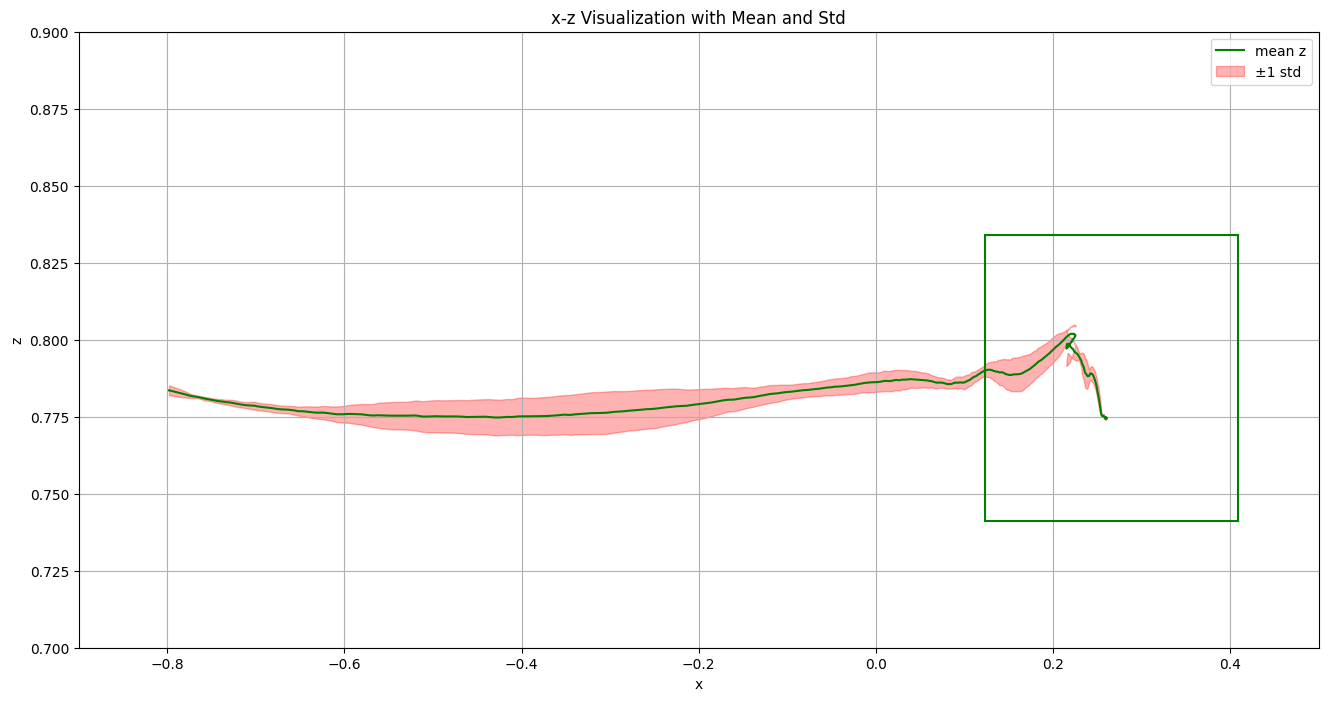

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def plot_hangar_box():
    ''' Plot the hangar box boundaries. '''
    x_min, x_max = 0.155-0.032, 0.377+0.032
    z_min, z_max = 0.741, 0.834
    plt.plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
    plt.plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
    plt.plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
    plt.plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边

def load_filtered_data(file_path, x_threshold= -0.80):
    """从 CSV 文件中加载并过滤轨迹数据，保留 x > 阈值 且 t > 最后一行时间 的数据"""
    df = pd.read_csv(file_path, header=None, skiprows=1)

    t_start = df[0].iloc[-1] 
    df = df.iloc[:-1]  # 跳过最后一行（最后一行只是个标记） 刚刚这里翻了一个致命错误，先跳过了最后一行，然后才对数据做的裁剪，shit，导致数组为空了

    df = df[df[1] > x_threshold]  # x 过滤
    df = df[df[0] > t_start]  # the last row value is the time when the trajectory starts to execute

    return df[[0, 1, 3]]  # 返回 t, x, z


if __name__ == '__main__':

    plt.figure(figsize=(4*4,2*4))

    # 收集所有轨迹数据
    all_t = []
    all_x = []
    all_z = []

    for csv_file in glob.glob('./data/middle/*.csv'):
        df = load_filtered_data(csv_file)
        if df.empty:
            print(f"{csv_file} -> 空数据，跳过")
            continue

        t = df[0].to_numpy()
        t = t - t[0]  # 对齐时间到0
        x = df[1].to_numpy()
        z = df[3].to_numpy()

        # plt.plot(x, z, alpha=0.5)

        all_t.append(t)
        all_x.append(x)
        all_z.append(z)

    t_min = max([t[0] for t in all_t])  # list comprehension, a more easy and efficient way is : t_min = np.max(all[:, 0])
    t_max = min([t[-1] for t in all_t])
    t_common = np.linspace(t_min, t_max, 500)
    
    x_interp_all = []
    z_interp_all = []
    
    for t, x, z in zip(all_t, all_x, all_z):
        x_interp = np.interp(t_common, t, x)
        z_interp = np.interp(t_common, t, z)
        x_interp_all.append(x_interp)
        z_interp_all.append(z_interp)
    
    x_interp_all = np.array(x_interp_all)
    z_interp_all = np.array(z_interp_all)




    x_mean= np.mean(x_interp_all, axis=0)
    x_std = np.std(x_interp_all, axis=0)

    z_mean = np.mean(z_interp_all, axis=0)
    z_std = np.std(z_interp_all, axis=0)

    # 画均值曲线（实线）和标准差阴影带
    plt.plot(x_mean, z_mean, color='green', label='mean z')
    plt.fill_between(x_mean, z_mean - z_std, z_mean + z_std, color='red', alpha=0.3, label='±1 std')


    plot_hangar_box()


    # 图形设置
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('x-z Visualization with Mean and Std')
    plt.grid(True)
    plt.xlim(-0.9, 0.5)
    plt.ylim(0.4+0.3, 1.1-0.2)
    # plt.axis('equal')
    plt.legend()
    plt.show()


## 观察X轴是否有回勾(是否单调)

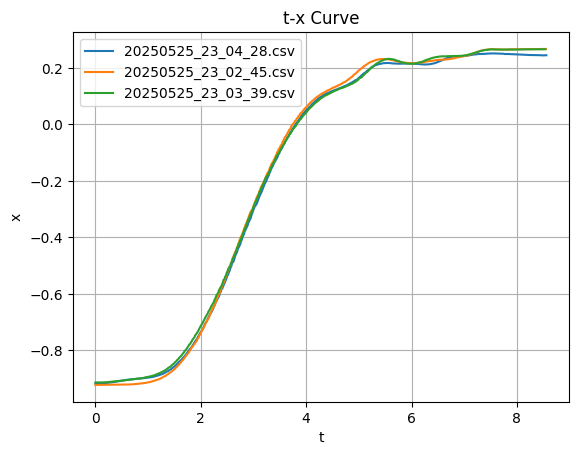

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import argparse

import uav_trajectory
import pandas as pd
import glob


def load_filtered_data(file_path, value_threshold=-0.877):
    df = pd.read_csv(file_path, header=None, skiprows=1)

    filtered_data = df.iloc[:-1]  # Skip the last row. It records the time when the trajectory starts to execute.
    last_time = df.iloc[-1, 0]
    filtered_data = filtered_data[filtered_data[0] > last_time]

    # filtered_data = filtered_data[filtered_data[1] > value_threshold]

    return filtered_data


for csv_file in glob.glob('./data/middle/*.csv'):
    df = load_filtered_data(csv_file)
    t = df[0].to_numpy()
    x = df[1].to_numpy()
    plt.plot(t-t[0], x, label=csv_file.split('/')[-1])  # 横轴t，纵轴x

plt.xlabel('t')
plt.ylabel('x')
plt.title('t-x Curve')
plt.legend()
plt.grid(True)
plt.show()

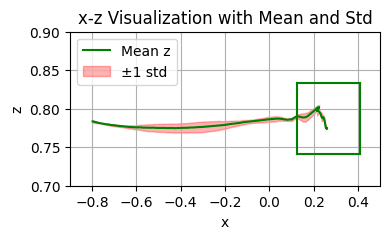

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def load_and_filter_trajectories(file_pattern, x_threshold=-0.80):
    """
    Load and filter trajectory data from CSV files.
    
    Args:
        file_pattern (str): Glob pattern for CSV files (e.g., './data/middle/*.csv').
        x_threshold (float): Threshold for filtering x values.
    
    Returns:
        list: Lists of t, x, z arrays for each valid trajectory.
    """
    all_t, all_x, all_z = [], [], []
    
    for csv_file in glob.glob(file_pattern):
        try:
            df = pd.read_csv(csv_file, header=None, skiprows=1)
            t_start = df[0].iloc[-1]
            df = df.iloc[:-1]
            df = df[(df[1] > x_threshold) & (df[0] > t_start)]
            
            if df.empty:
                print(f"{csv_file} -> Empty data, skipping")
                continue
                
            t = df[0].to_numpy() - df[0].iloc[0]  # Align time to 0
            x = df[1].to_numpy()
            z = df[3].to_numpy()
            
            all_t.append(t)
            all_x.append(x)
            all_z.append(z)
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
            continue
            
    return all_t, all_x, all_z

def interpolate_trajectories(all_t, all_x, all_z, num_points=500):
    """
    Interpolate trajectories to a common time grid and compute mean/std.
    
    Args:
        all_t (list): List of time arrays.
        all_x (list): List of x-coordinate arrays.
        all_z (list): List of z-coordinate arrays.
        num_points (int): Number of points for interpolation.
    
    Returns:
        tuple: Common time grid, mean and std for x and z.
    """
    t_min = max(t[0] for t in all_t)
    t_max = min(t[-1] for t in all_t)
    t_common = np.linspace(t_min, t_max, num_points)
    
    x_interp_all = [np.interp(t_common, t, x) for t, x in zip(all_t, all_x)]
    z_interp_all = [np.interp(t_common, t, z) for t, z in zip(all_t, all_z)]
    
    x_interp_all = np.array(x_interp_all)
    z_interp_all = np.array(z_interp_all)
    
    x_mean = np.mean(x_interp_all, axis=0)
    x_std = np.std(x_interp_all, axis=0)
    z_mean = np.mean(z_interp_all, axis=0)
    z_std = np.std(z_interp_all, axis=0)
    
    return t_common, x_mean, x_std, z_mean, z_std



def plot_hangar_box():
    x_min, x_max = 0.155 - 0.032, 0.377 + 0.032
    z_min, z_max = 0.741, 0.834
    plt.plot([x_min, x_max], [z_min, z_min], 'g-')  # Bottom
    plt.plot([x_min, x_max], [z_max, z_max], 'g-')  # Top
    plt.plot([x_min, x_min], [z_min, z_max], 'g-')  # Left
    plt.plot([x_max, x_max], [z_min, z_max], 'g-')  # Right



def plot_trajectory_stats(x_mean, z_mean, x_std, z_std):
    """
    Plot trajectory statistics with hangar box boundaries.
    
    Args:
        x_mean (array): Mean x coordinates.
        z_mean (array): Mean z coordinates.
        x_std (array): Standard deviation of x coordinates.
        z_std (array): Standard deviation of z coordinates.
        output_file (str): File path to save the plot.
    """
    
    plt.figure(figsize=(4, 2))
    plt.plot(x_mean, z_mean, color='green', label='Mean z')
    plt.fill_between(x_mean, z_mean - z_std, z_mean + z_std, color='red', alpha=0.3, label='±1 std')
    
    plot_hangar_box()
    
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('x-z Visualization with Mean and Std')
    plt.grid(True)
    plt.xlim(-0.9, 0.5)
    plt.ylim(0.7, 0.9)
    plt.legend()
    plt.show()

def process_and_plot_trajectories(file_pattern='./data/middle/*.csv', x_threshold=-0.80, num_points=500):
    """
    Process and plot trajectories from CSV files.
    
    Args:
        file_pattern (str): Glob pattern for CSV files.
        x_threshold (float): Threshold for filtering x values.
        num_points (int): Number of points for interpolation.
    """
    all_t, all_x, all_z = load_and_filter_trajectories(file_pattern, x_threshold)
    if not all_t:
        print("No valid data to process.")
        return
    
    t_common, x_mean, x_std, z_mean, z_std = interpolate_trajectories(all_t, all_x, all_z, num_points)
    plot_trajectory_stats(x_mean, z_mean, x_std, z_std, )

if __name__ == '__main__':
    process_and_plot_trajectories()

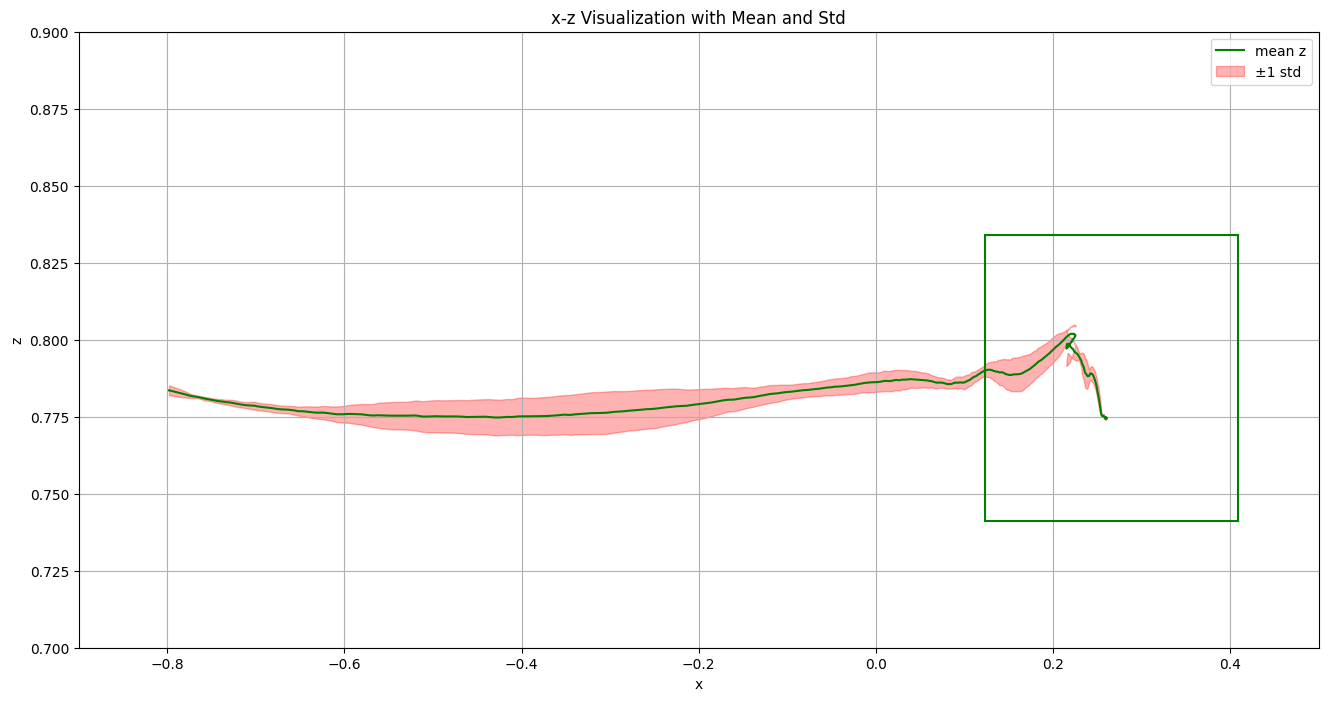

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

def plot_hangar_box():
    ''' Plot the hangar box boundaries. '''
    x_min, x_max = 0.155-0.032, 0.377+0.032
    z_min, z_max = 0.741, 0.834
    plt.plot([x_min, x_max], [z_min, z_min], 'g-')  # 下边
    plt.plot([x_min, x_max], [z_max, z_max], 'g-')  # 上边
    plt.plot([x_min, x_min], [z_min, z_max], 'g-')  # 左边
    plt.plot([x_max, x_max], [z_min, z_max], 'g-')  # 右边

def load_filtered_data(file_path, x_threshold= -0.80):
    '''Load and filter trajectory data from a CSV file.
    Args:
        file_path (str): Path to the CSV file.
        x_threshold (float): Threshold for filtering x values.
    Returns:
        pd.DataFrame: Filtered DataFrame with columns [t, x, z].'''
    df = pd.read_csv(file_path, header=None, skiprows=1)

    t_start = df[0].iloc[-1]     # step 1: read last row time, the last row value is the time when the trajectory starts to execute
    df = df.iloc[:-1]            # step 2: drop last row
    df = df[df[0] > t_start]     # step 3: filter by time 
    df = df[df[1] > x_threshold] # step 4: filter by x threshold
    return df[[0, 1, 3]]         # return t, x, z


if __name__ == '__main__':

    plt.figure(figsize=(4*4,2*4))

    # 收集所有轨迹数据
    all_t = []
    all_x = []
    all_z = []

    for csv_file in glob.glob('./data/middle/*.csv'):
        df = load_filtered_data(csv_file)
        if df.empty:
            print(f"{csv_file} -> 空数据，跳过")
            continue

        t = df[0].to_numpy()
        t = t - t[0]  # 对齐时间到0
        x = df[1].to_numpy()
        z = df[3].to_numpy()

        # plt.plot(x, z, alpha=0.5)

        all_t.append(t)
        all_x.append(x)
        all_z.append(z)

    t_min = max([t[0] for t in all_t])  # list comprehension, a more easy and efficient way is : t_min = np.max(all[:, 0])
    t_max = min([t[-1] for t in all_t])
    t_common = np.linspace(t_min, t_max, 500)
    
    x_interp_all = []
    z_interp_all = []
    
    for t, x, z in zip(all_t, all_x, all_z):
        x_interp = np.interp(t_common, t, x)
        z_interp = np.interp(t_common, t, z)
        x_interp_all.append(x_interp)
        z_interp_all.append(z_interp)
    
    x_interp_all = np.array(x_interp_all)
    z_interp_all = np.array(z_interp_all)




    x_mean= np.mean(x_interp_all, axis=0)
    x_std = np.std(x_interp_all, axis=0)

    z_mean = np.mean(z_interp_all, axis=0)
    z_std = np.std(z_interp_all, axis=0)

    # 画均值曲线（实线）和标准差阴影带
    plt.plot(x_mean, z_mean, color='green', label='mean z')
    plt.fill_between(x_mean, z_mean - z_std, z_mean + z_std, color='red', alpha=0.3, label='±1 std')


    plot_hangar_box()


    # 图形设置
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('x-z Visualization with Mean and Std')
    plt.grid(True)
    plt.xlim(-0.9, 0.5)
    plt.ylim(0.4+0.3, 1.1-0.2)
    # plt.axis('equal')
    plt.legend()
    plt.show()


## Radar Plot

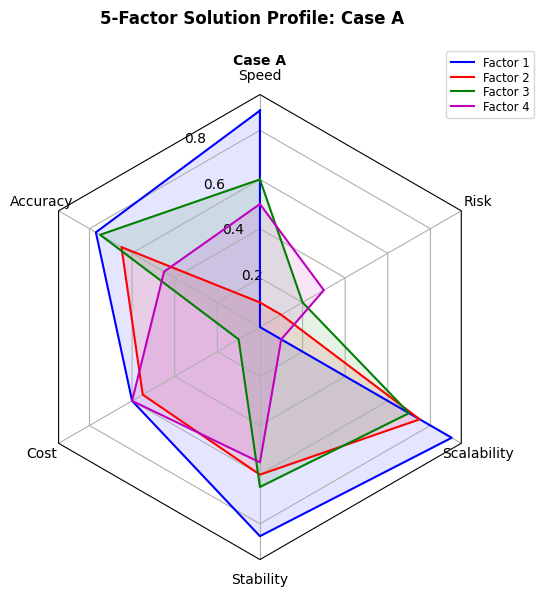

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    data = [
        ['Speed', 'Accuracy', 'Cost', 'Stability', 'Scalability', 'Risk'],
        ('Case A', [
            [0.88, 0.77, 0.60, 0.85, 0.90,0.0],
            [0.10, 0.65, 0.55, 0.60, 0.75,0.1],
            [0.60, 0.75, 0.10, 0.65, 0.70,0.2],
            [0.50, 0.45, 0.60, 0.55, 0.10,0.3],
        ])
    ]
    return data

if __name__ == '__main__':

    # 设置角度维度数
    N = 6
    theta = radar_factory(N, frame='polygon')

    # 获取数据
    data = example_data()
    spoke_labels = data.pop(0)

    fig, ax = plt.subplots(figsize=(6, 6), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm']
    title, case_data = data[0]
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                horizontalalignment='center', verticalalignment='center')

    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.1, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4')
    ax.legend(labels, loc=(0.9, .95), labelspacing=0.15, fontsize='small')

    plt.suptitle('5-Factor Solution Profile: ' + title, weight='bold', size='large')

    plt.show()

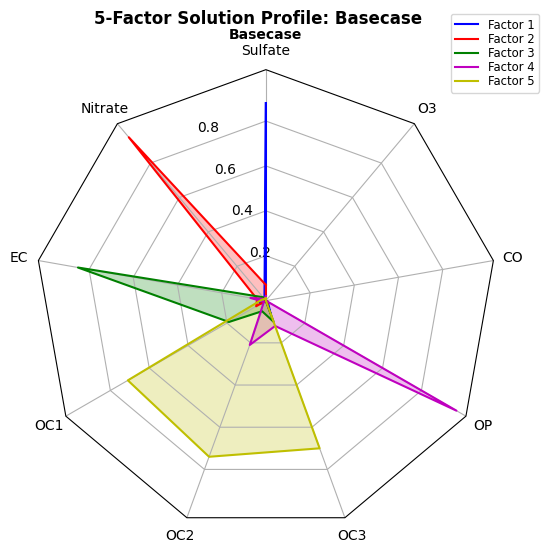

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, ax = plt.subplots(figsize=(6, 6), 
                           subplot_kw=dict(projection='radar'))
    
    colors = ['b', 'r', 'g', 'm', 'y']
    title, case_data = data[0] # 只取第一个案例
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                horizontalalignment='center', verticalalignment='center')
    

    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)

    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    ax.legend(labels, loc=(0.9, .95), labelspacing=0.1, fontsize='small')

    plt.suptitle('5-Factor Solution Profile: ' + title, weight='bold', size='large')

    plt.show()